In [3]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
origin = pd.read_csv("./data/Origin.csv")

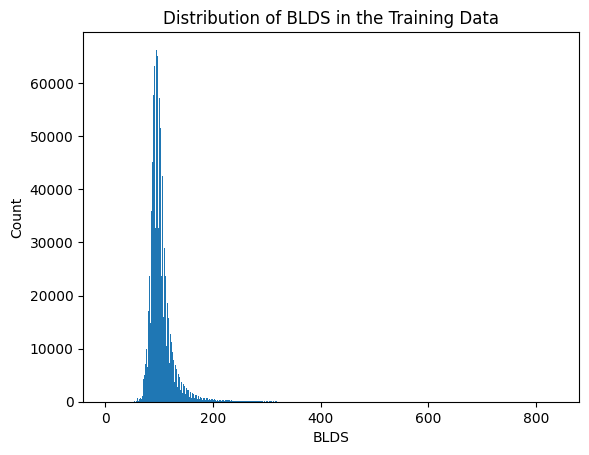

In [14]:
plt.hist(origin.BLDS, bins=500)
plt.xlabel('BLDS')
plt.ylabel('Count')
plt.title('Distribution of BLDS in the Training Data')
plt.show()

In [5]:
origin = origin.dropna(subset=['OLIG_PROTE_CD'])

In [12]:
origin.TTR_YN.value_counts()

TTR_YN
0.0    150213
1.0    149297
2.0     15897
Name: count, dtype: int64

In [6]:
origin_df = origin.dropna(subset=['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE']) #콜레스트롤
origin_df = origin_df.dropna(subset=['BLDS'])
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414980 entries, 574465 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HCHK_YEAR          414980 non-null  int64  
 1   IDV_ID             414980 non-null  int64  
 2   SIDO               414980 non-null  int64  
 3   SEX                414980 non-null  int64  
 4   AGE_GROUP          414980 non-null  int64  
 5   HEIGHT             414980 non-null  int64  
 6   WEIGHT             414980 non-null  int64  
 7   WAIST              414948 non-null  float64
 8   SIGHT_LEFT         414901 non-null  float64
 9   SIGHT_RIGHT        414904 non-null  float64
 10  HEAR_LEFT          414901 non-null  float64
 11  HEAR_RIGHT         414902 non-null  float64
 12  BP_HIGH            414974 non-null  float64
 13  BP_LWST            414973 non-null  float64
 14  BLDS               414980 non-null  float64
 15  TOT_CHOLE          414980 non-null  float64
 16  TR

In [17]:
origin_df = origin_df.sample(frac=1)

In [7]:
origin_df.BLDS.isnull().sum()

0

In [8]:
origin_df['D'] = origin_df['BLDS'].apply(lambda x : 1 if x >= 126 else 0)

In [9]:
origin_df.to_csv('./data/origin_df.csv')